<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 142.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 155.4 MB/s eta 0:00:00


In [12]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 144.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 135.9 MB/s eta 0:00:00


### Step 1: Import Required Libraries


In [3]:
import pandas as pd

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [4]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [5]:
## Write your code here
duplicated_rows = df[df.duplicated()]
len(duplicated_rows)

0

### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [7]:
## Write your code here
df.drop_duplicates(inplace=True)
df.shape

(65437, 114)

### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [9]:
## Write your code here
missing_values = df.isnull().sum().to_frame(name="Missing Count")
missing_values["Missing %"] = (missing_values["Missing Count"] / len(df)) * 100

print(missing_values.sort_values("Missing %", ascending=False))

# Find most frequent value (mode)
most_frequent = df["EdLevel"].mode()[0]

# Fill missing values with mode
df["EdLevel"].fillna(most_frequent, inplace=True)

print(f"Missing values in EdLevel after imputation: {df['EdLevel'].isnull().sum()}")

                            Missing Count  Missing %
AINextMuch less integrated          64289  98.245641
AINextLess integrated               63082  96.401119
AINextNo change                     52939  80.900714
AINextMuch more integrated          51999  79.464217
EmbeddedAdmired                     48704  74.428840
...                                   ...        ...
MainBranch                              0   0.000000
Age                                     0   0.000000
Employment                              0   0.000000
Check                                   0   0.000000
ResponseId                              0   0.000000

[114 rows x 2 columns]
Missing values in EdLevel after imputation: 0


/tmp/ipykernel_298/1864313986.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["EdLevel"].fillna(most_frequent, inplace=True)


In [10]:
print(df["EdLevel"].value_counts())


EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          29595
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


Missing values in ConvertedCompYearly: 0 (0.00%)
Missing after fill: 0
count    6.543700e+04
mean     7.257636e+04
std      1.122207e+05
min      1.000000e+00
25%      6.500000e+04
50%      6.500000e+04
75%      6.500000e+04
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


/tmp/ipykernel_298/1332832982.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ConvertedCompYearly"].fillna(median_salary, inplace=True)


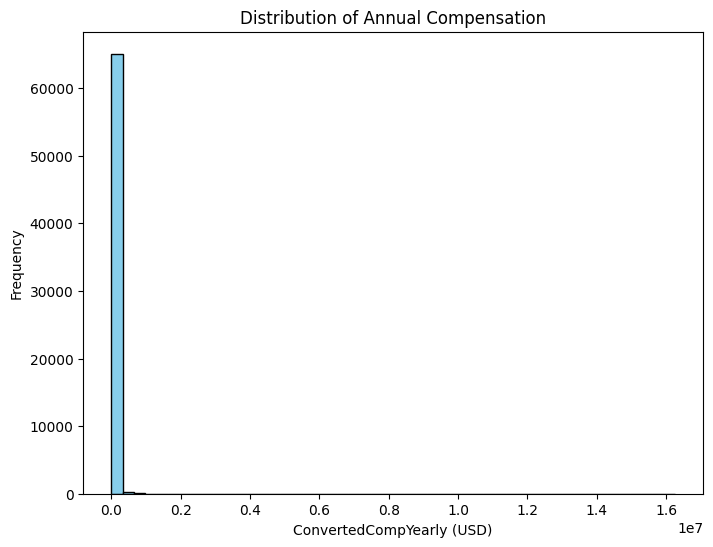

In [13]:
## Write your code here
# Count missing values
missing_count = df["ConvertedCompYearly"].isnull().sum()
missing_percent = (missing_count / len(df)) * 100

print(f"Missing values in ConvertedCompYearly: {missing_count} ({missing_percent:.2f}%)")



# Fill missing with median value
median_salary = df["ConvertedCompYearly"].median()
df["ConvertedCompYearly"].fillna(median_salary, inplace=True)

print(f"Missing after fill: {df['ConvertedCompYearly'].isnull().sum()}")

print(df["ConvertedCompYearly"].describe())
# Example histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df["ConvertedCompYearly"].plot(kind="hist", bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Annual Compensation")
plt.xlabel("ConvertedCompYearly (USD)")
plt.ylabel("Frequency")
plt.show()


### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


In [ ]:
## Write your code here

<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


Copyright © IBM Corporation. All rights reserved.
